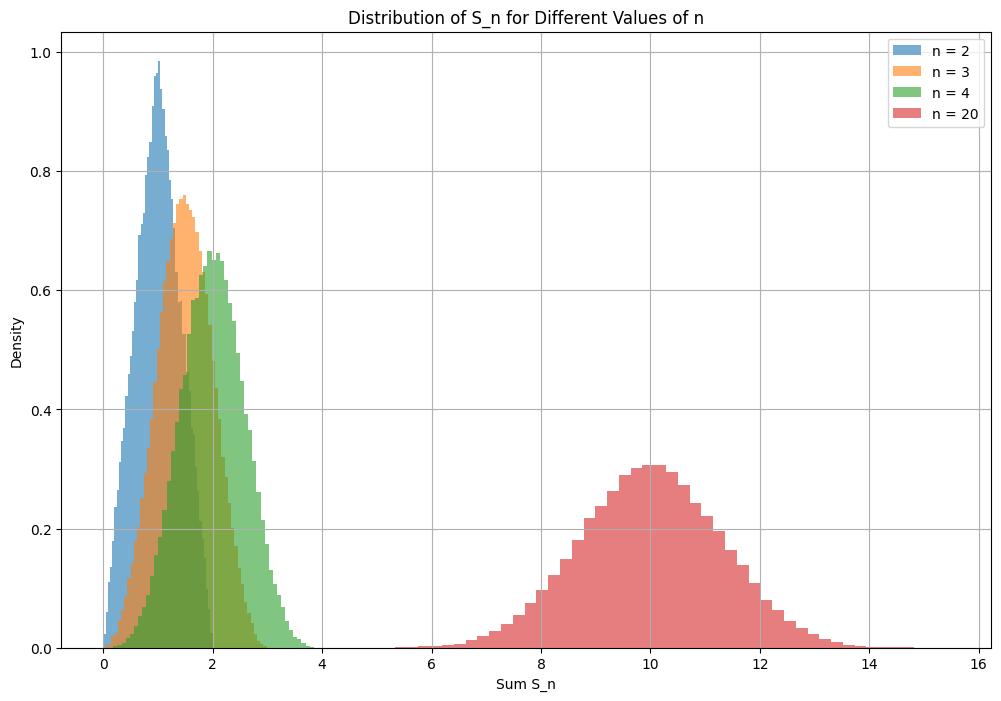

In [1]:
import numpy as np
import matplotlib.pyplot as plt


num_samples = 100000

n_values = [2,3,4,20]

plt.figure(figsize=(12, 8))

for n in n_values:

    sums = np.sum(np.random.uniform(0, 1, (num_samples, n)), axis=1)



    plt.hist(sums, density=True, bins=50,  alpha=0.6, label=f'n = {n}')


plt.title('Distribution of S_n for Different Values of n')
plt.xlabel('Sum S_n')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


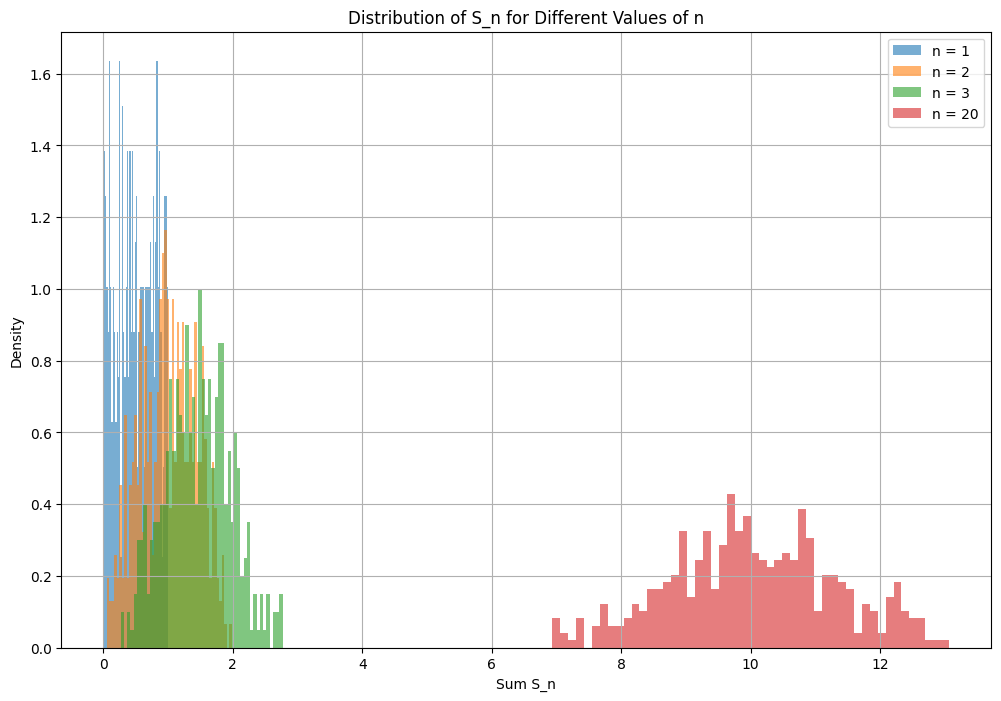

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


num_samples = 400

n_values = [1, 2, 3, 20]

plt.figure(figsize=(12, 8))

for n in n_values:

    sums = np.sum(np.random.uniform(0, 1, (num_samples, n)), axis=1)


    plt.hist(sums, bins=50, density=True, alpha=0.6, label=f'n = {n}')


plt.title('Distribution of S_n for Different Values of n')
plt.xlabel('Sum S_n')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


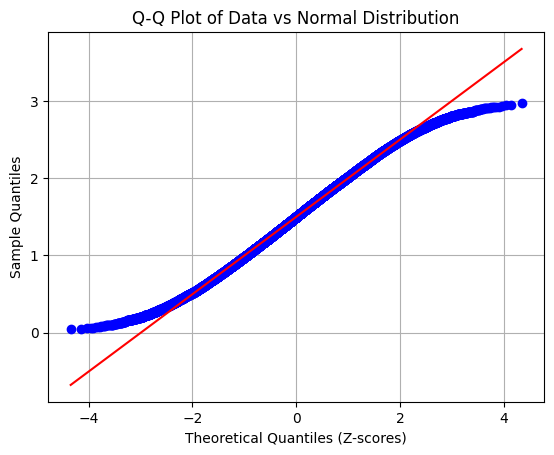

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
n = 3
size = 100000

sums = np.sum(np.random.uniform(0, 1, (size, n)), axis=1)
sorted_sums = np.sort(sums)

stats.probplot(sorted_sums, dist="norm", plot=plt)


plt.title("Q-Q Plot of Data vs Normal Distribution")
plt.xlabel("Theoretical Quantiles (Z-scores)")
plt.ylabel("Sample Quantiles")
plt.grid(True)
plt.show()


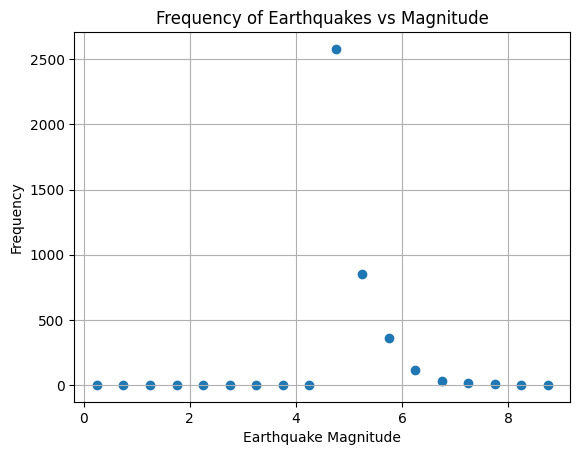

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


filename = 'Earthquakes_himalayas_1900-2020.csv'

data = pd.read_csv(filename)


magnitudes = data.iloc[:, 4]


bin_edges = np.arange(0, magnitudes.max() + 0.5, 0.5)


frequencies, _ = np.histogram(magnitudes, bins=bin_edges)


bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2


plt.scatter(bin_midpoints, frequencies)
plt.xlabel('Earthquake Magnitude')
plt.ylabel('Frequency')
plt.title('Frequency of Earthquakes vs Magnitude')
plt.grid(True)
plt.show()


Fitted values: a = 1261743004048.0708, b = 13.06779950777768


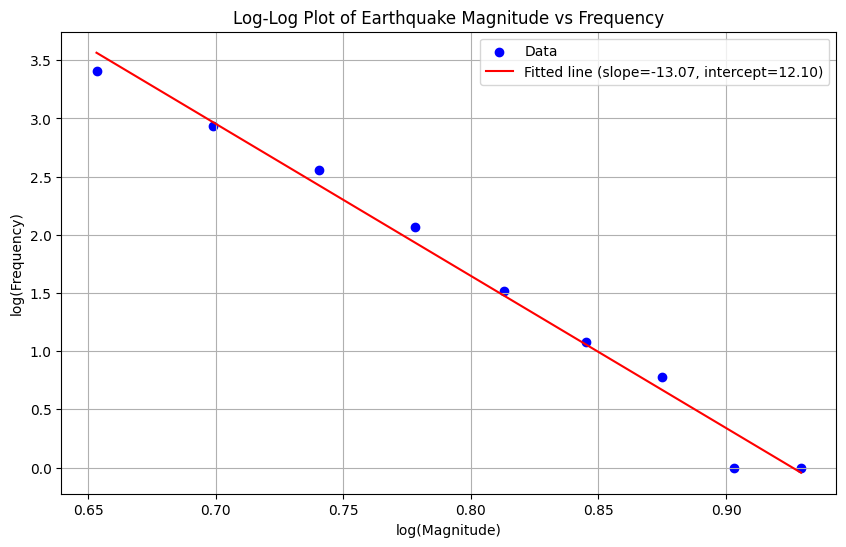

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress


filename = 'Earthquakes_himalayas_1900-2020.csv'
data = pd.read_csv(filename)
magnitudes = data.iloc[:, 4]


bin_edges = np.arange(0, magnitudes.max() + 0.5, 0.5)
frequencies, _ = np.histogram(magnitudes, bins=bin_edges)

# Filter out zero frequencies to avoid log(0) issues
non_zero_indices = frequencies > 0
# Corresponding magnitude bins
magnitudes_non_zero = bin_edges[:-1][non_zero_indices]
frequencies_non_zero = frequencies[non_zero_indices]


log_M = np.log10(magnitudes_non_zero)
log_N = np.log10(frequencies_non_zero)

#Perform linear regression to find slope and intercept
slope, intercept, r_value, p_value, std_err = linregress(log_M, log_N)
b = -slope
a = 10**intercept


print(f"Fitted values: a = {a}, b = {b}")


plt.figure(figsize=(10, 6))
plt.scatter(log_M, log_N, label='Data', color='blue')
plt.plot(log_M, slope*log_M + intercept, label=f'Fitted line (slope={slope:.2f}, intercept={intercept:.2f})', color='red')
plt.xlabel('log(Magnitude)')
plt.ylabel('log(Frequency)')
plt.title('Log-Log Plot of Earthquake Magnitude vs Frequency')
plt.legend()
plt.grid(True)
plt.show()


Fitted values: a = 1261743004048.0708, b = 13.06779950777768
Residual Sum of Squares (RSS): 0.16764582817244722


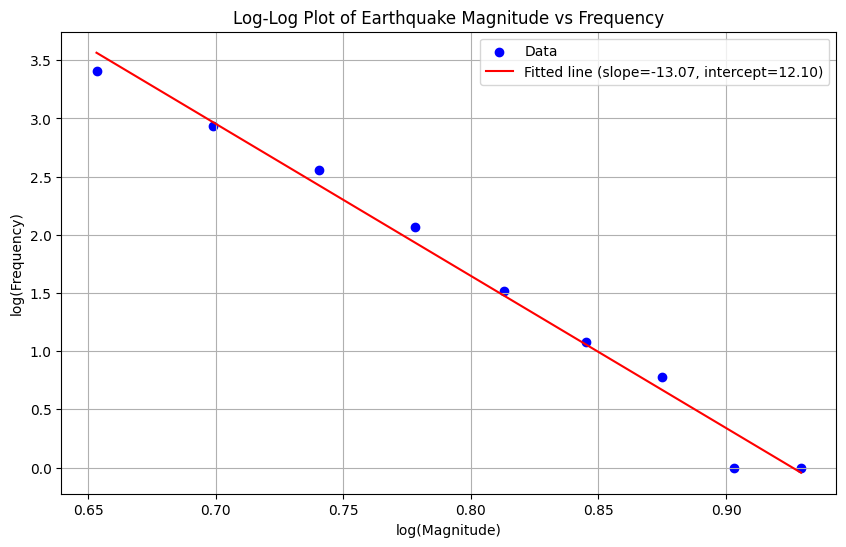

The model provides a good fit to the data, as indicated by a relatively low RSS value.


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

filename = 'Earthquakes_himalayas_1900-2020.csv'
data = pd.read_csv(filename)
magnitudes = data.iloc[:, 4]


bin_edges = np.arange(0, magnitudes.max() + 0.5, 0.5)
frequencies, _ = np.histogram(magnitudes, bins=bin_edges)

# Filter out zero frequencies to avoid log(0) issues
non_zero_indices = frequencies > 0
magnitudes_non_zero = bin_edges[:-1][non_zero_indices]
frequencies_non_zero = frequencies[non_zero_indices]

log_M = np.log10(magnitudes_non_zero)
log_N = np.log10(frequencies_non_zero)


slope, intercept, r_value, p_value, std_err = linregress(log_M, log_N)


b = -slope
a = 10**intercept

# Predict log(N) values using the fitted line equation
log_N_predicted = slope * log_M + intercept


residuals = log_N - log_N_predicted
rss = np.sum(residuals**2)


print(f"Fitted values: a = {a}, b = {b}")
print(f"Residual Sum of Squares (RSS): {rss}")


plt.figure(figsize=(10, 6))
plt.scatter(log_M, log_N, label='Data', color='blue')
plt.plot(log_M, log_N_predicted, label=f'Fitted line (slope={slope:.2f}, intercept={intercept:.2f})', color='red')
plt.xlabel('log(Magnitude)')
plt.ylabel('log(Frequency)')
plt.title('Log-Log Plot of Earthquake Magnitude vs Frequency')
plt.legend()
plt.grid(True)
plt.show()


if rss < 0.1:
    print("The model provides an excellent fit to the data, as indicated by the low RSS value.")
elif rss < 1:
    print("The model provides a good fit to the data, as indicated by a relatively low RSS value.")
else:
    print("The model does not provide a good fit to the data, as indicated by the high RSS value.")
